In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn import metrics

In [11]:
from sklearn.metrics import  classification_report, confusion_matrix

In [12]:
data=pd.read_csv("diabetes.csv")

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
data.shape

(768, 9)

In [16]:
data.shape[0]

768

In [17]:
data.shape[1]

9

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [26]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [28]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:title={'center':'Correlation Graph'}>

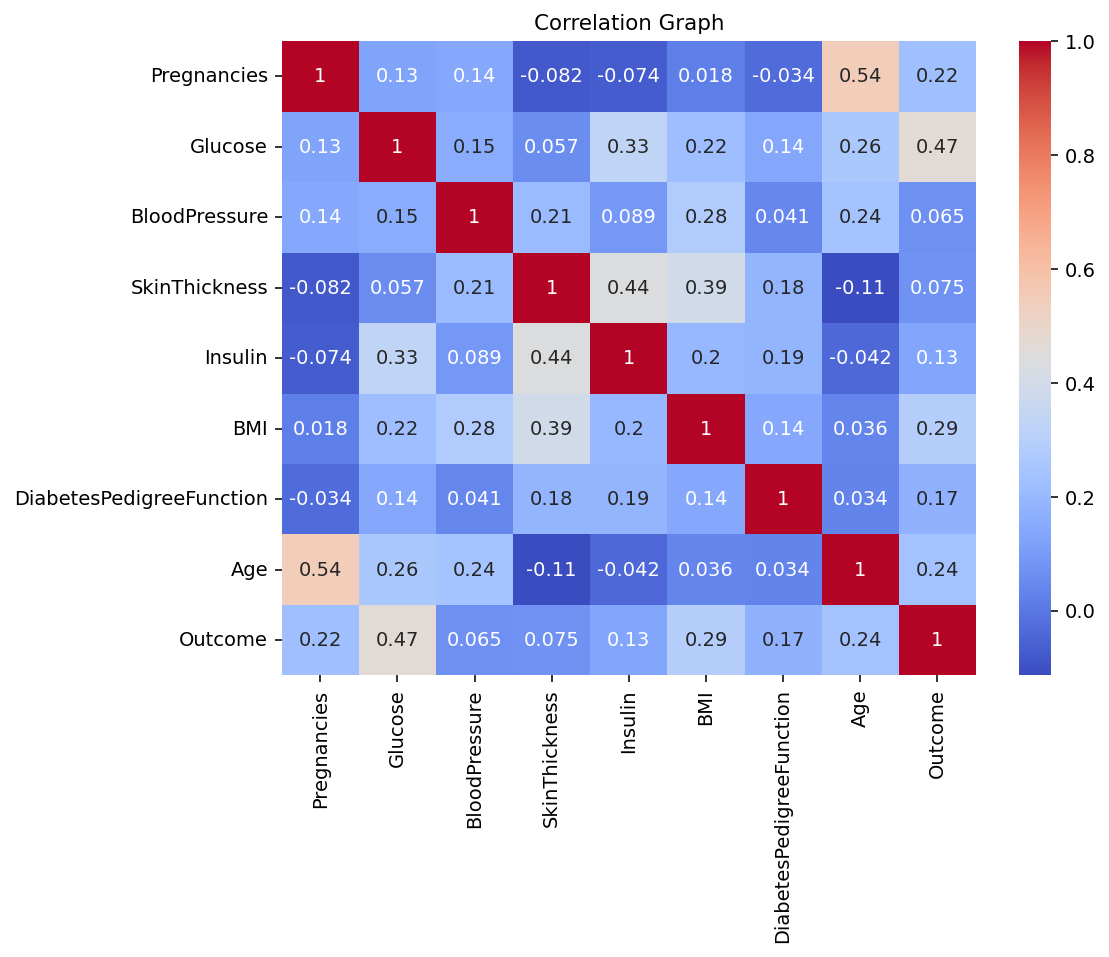

In [29]:
plt.figure(figsize=[8,6], dpi=140)
plt.title("Correlation Graph", fontsize=11)
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

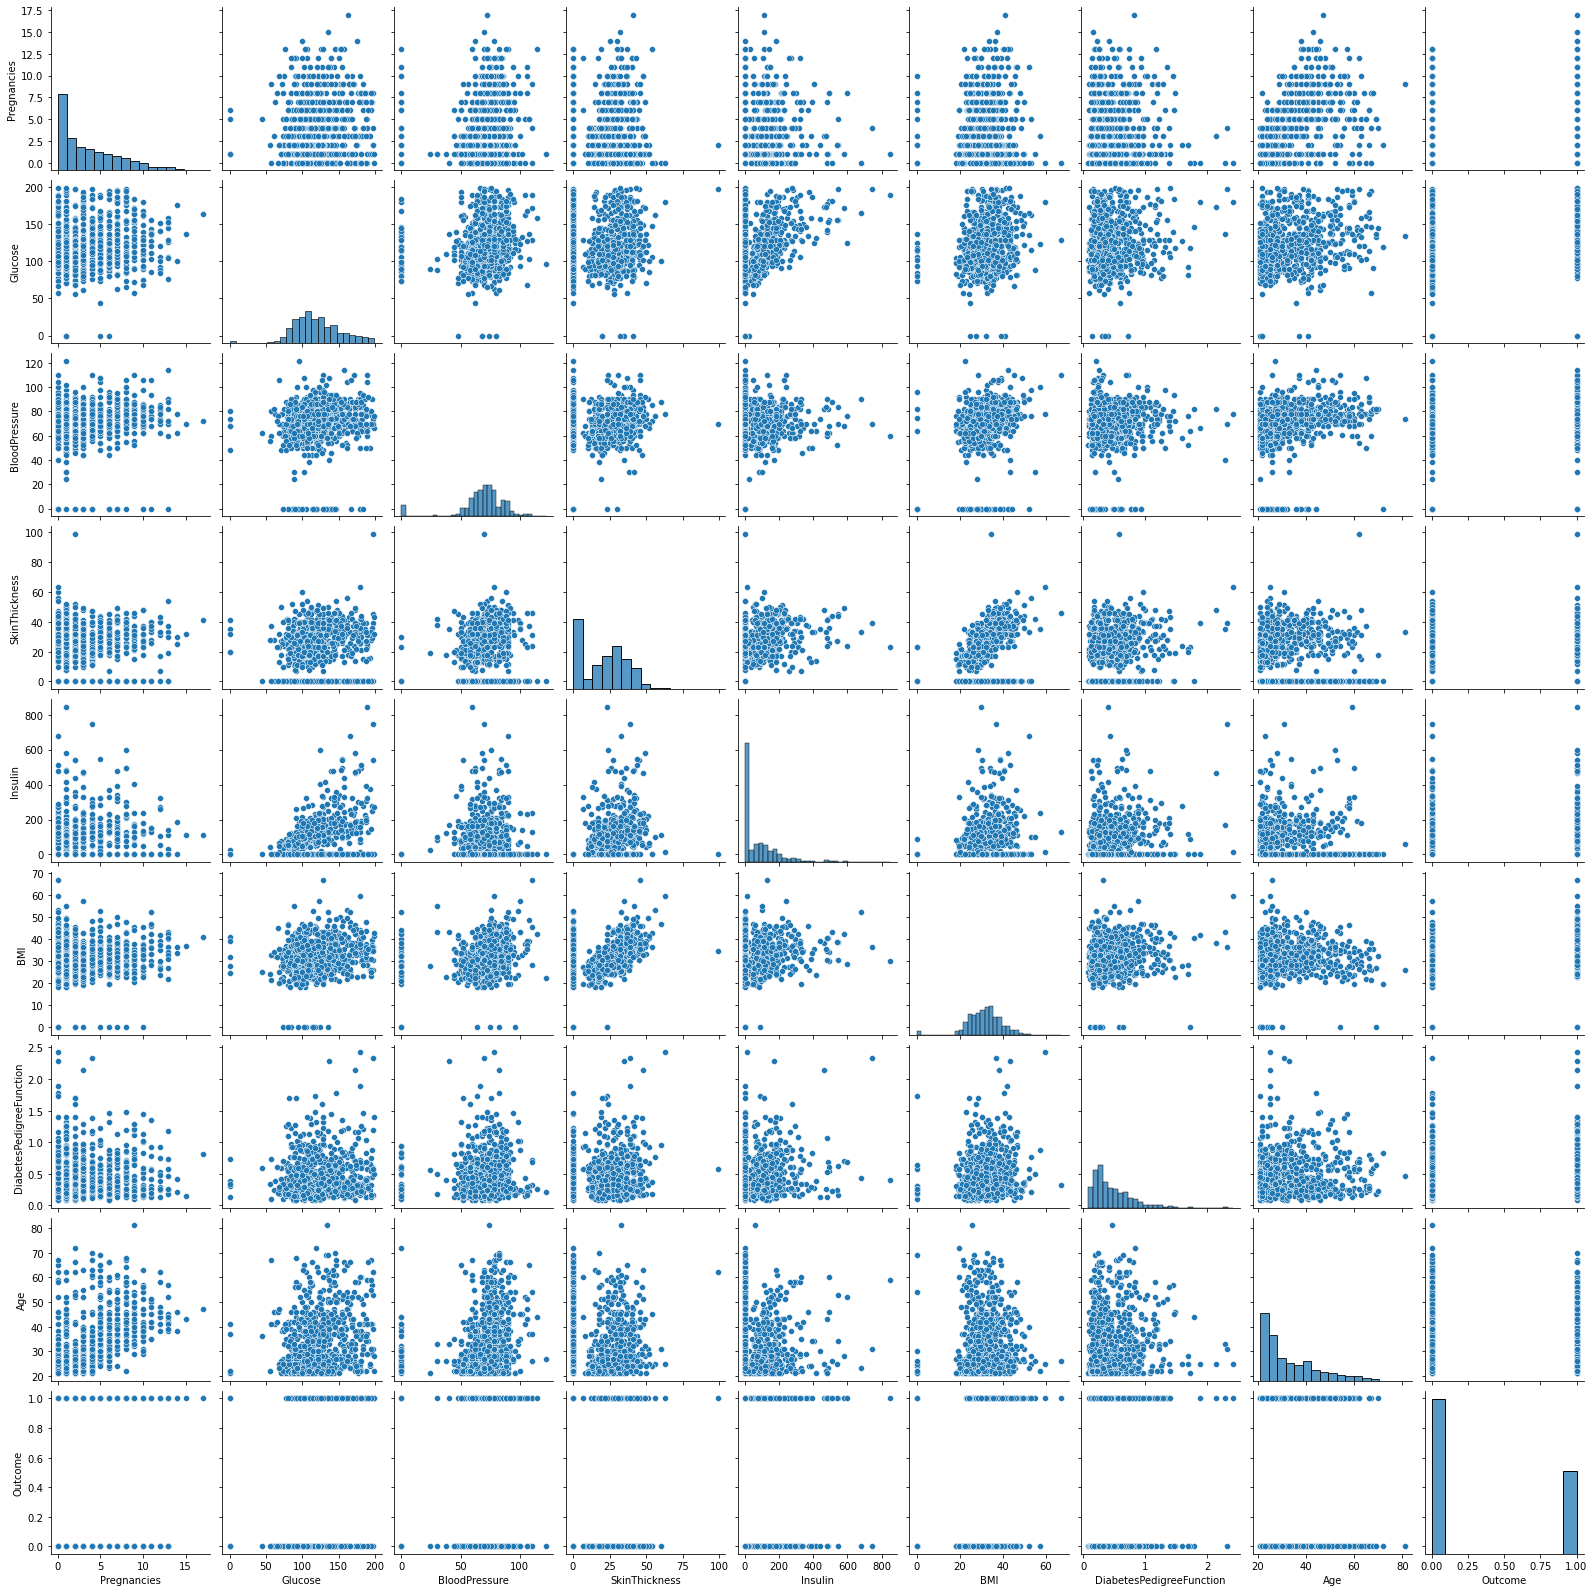

In [30]:
sns.pairplot(data)

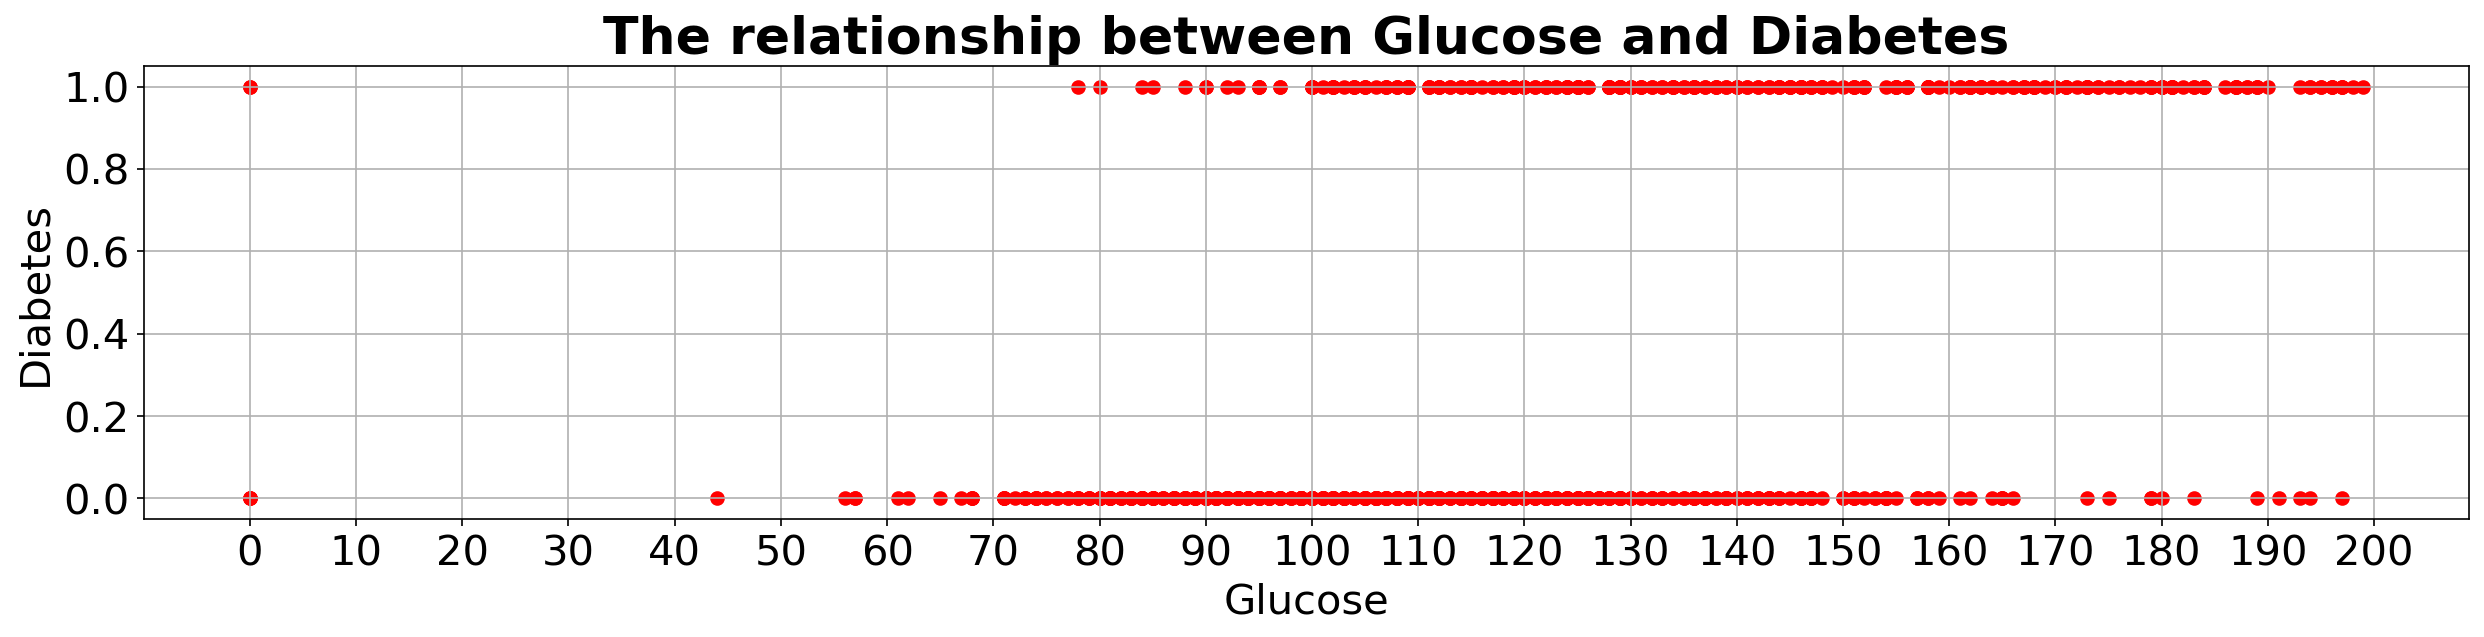

In [32]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (data["Glucose"] , data["Outcome"] , color = "red")
plt.title ("The relationship between Glucose and Diabetes" , weight='bold', fontsize = 25)
plt.xticks (range (0 , 205 , 10), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Glucose', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

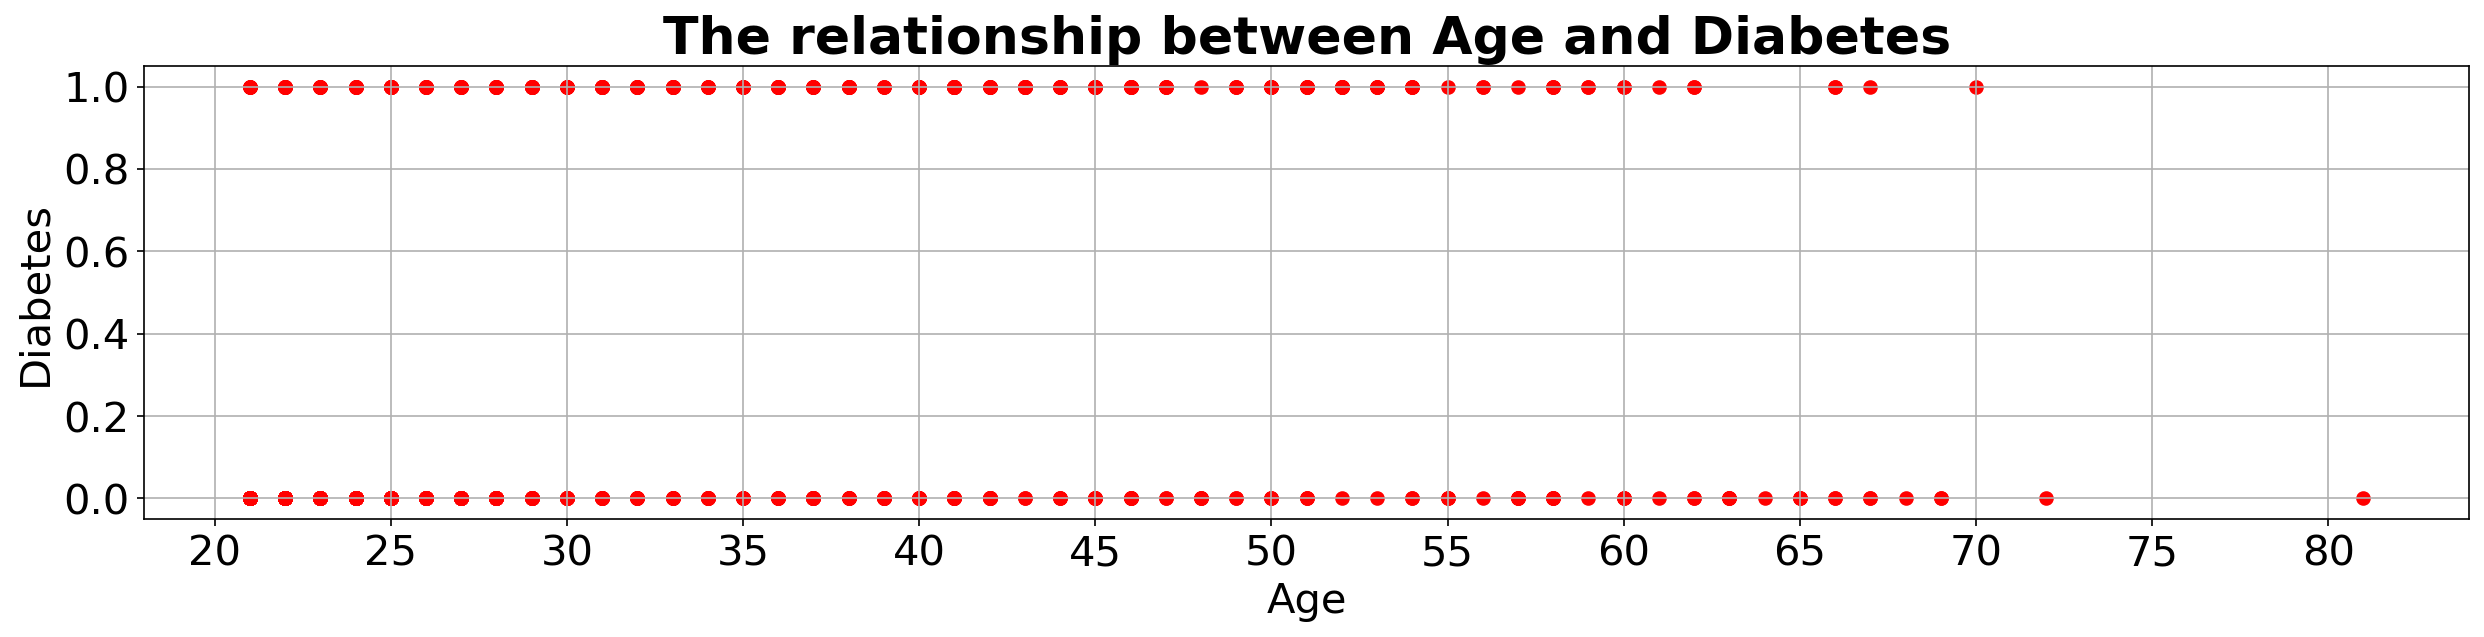

In [33]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (data["Age"] , data["Outcome"] , color = "red")
plt.title ("The relationship between Age and Diabetes" , weight='bold', fontsize = 25)
plt.xticks (range (20 , 85 , 5), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Age', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

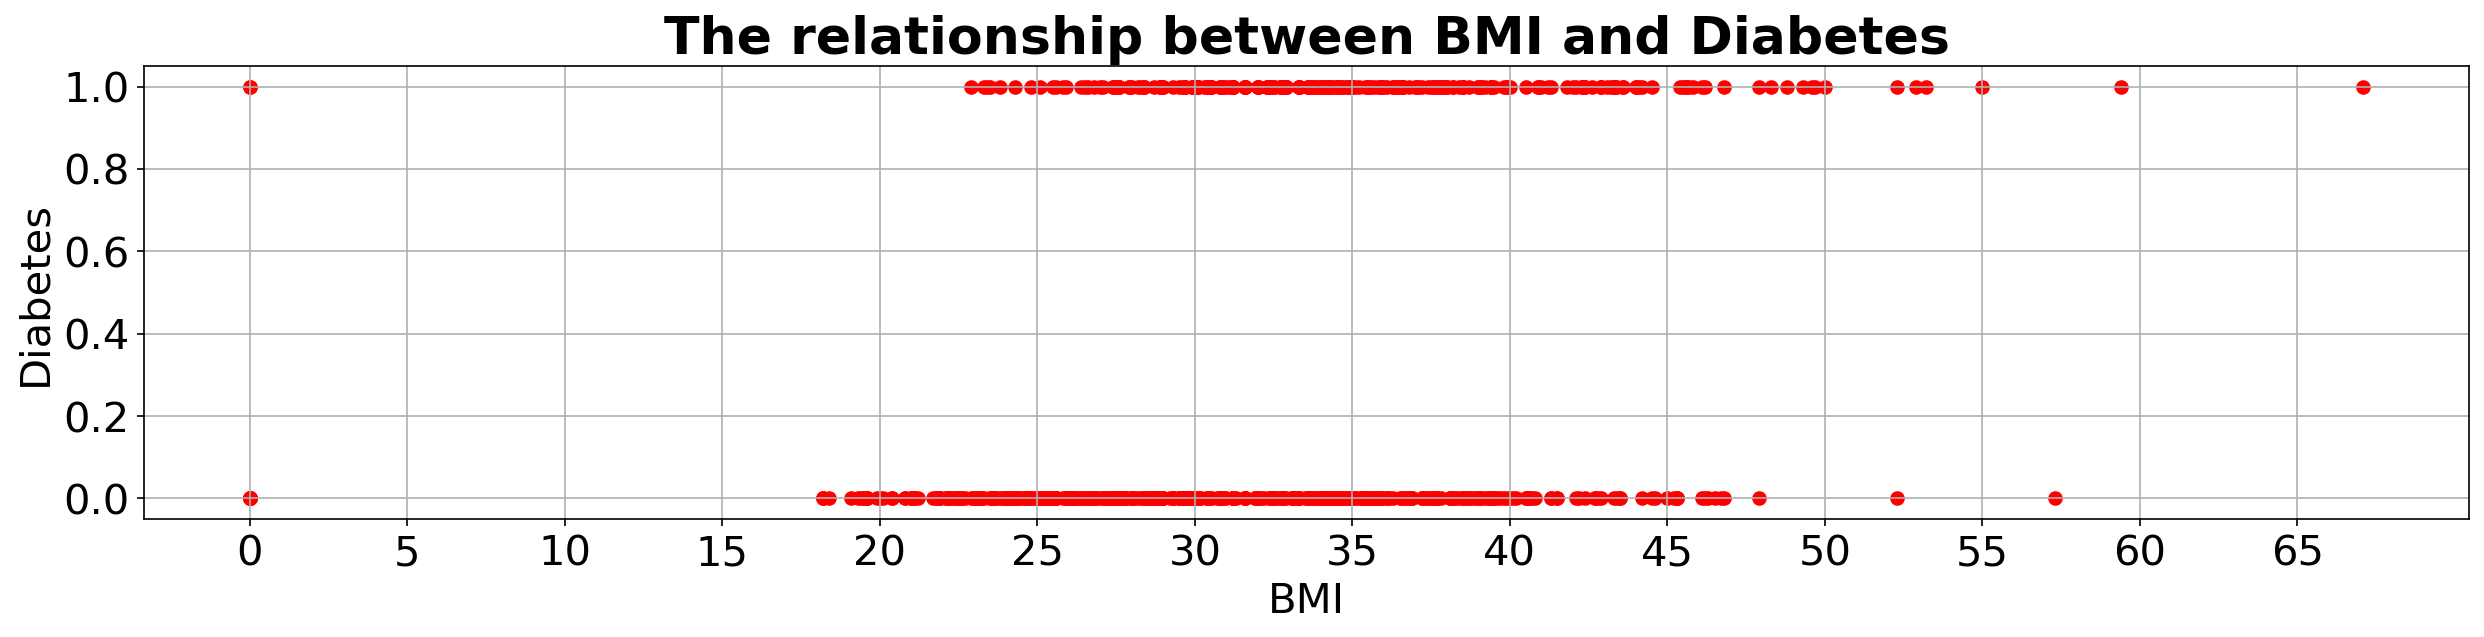

In [34]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (data["BMI"] , data["Outcome"] , color = "red")
plt.title ("The relationship between BMI and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 70 , 5) , fontsize=20)
plt.yticks (fontsize = 20)
plt.xlabel ('BMI', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

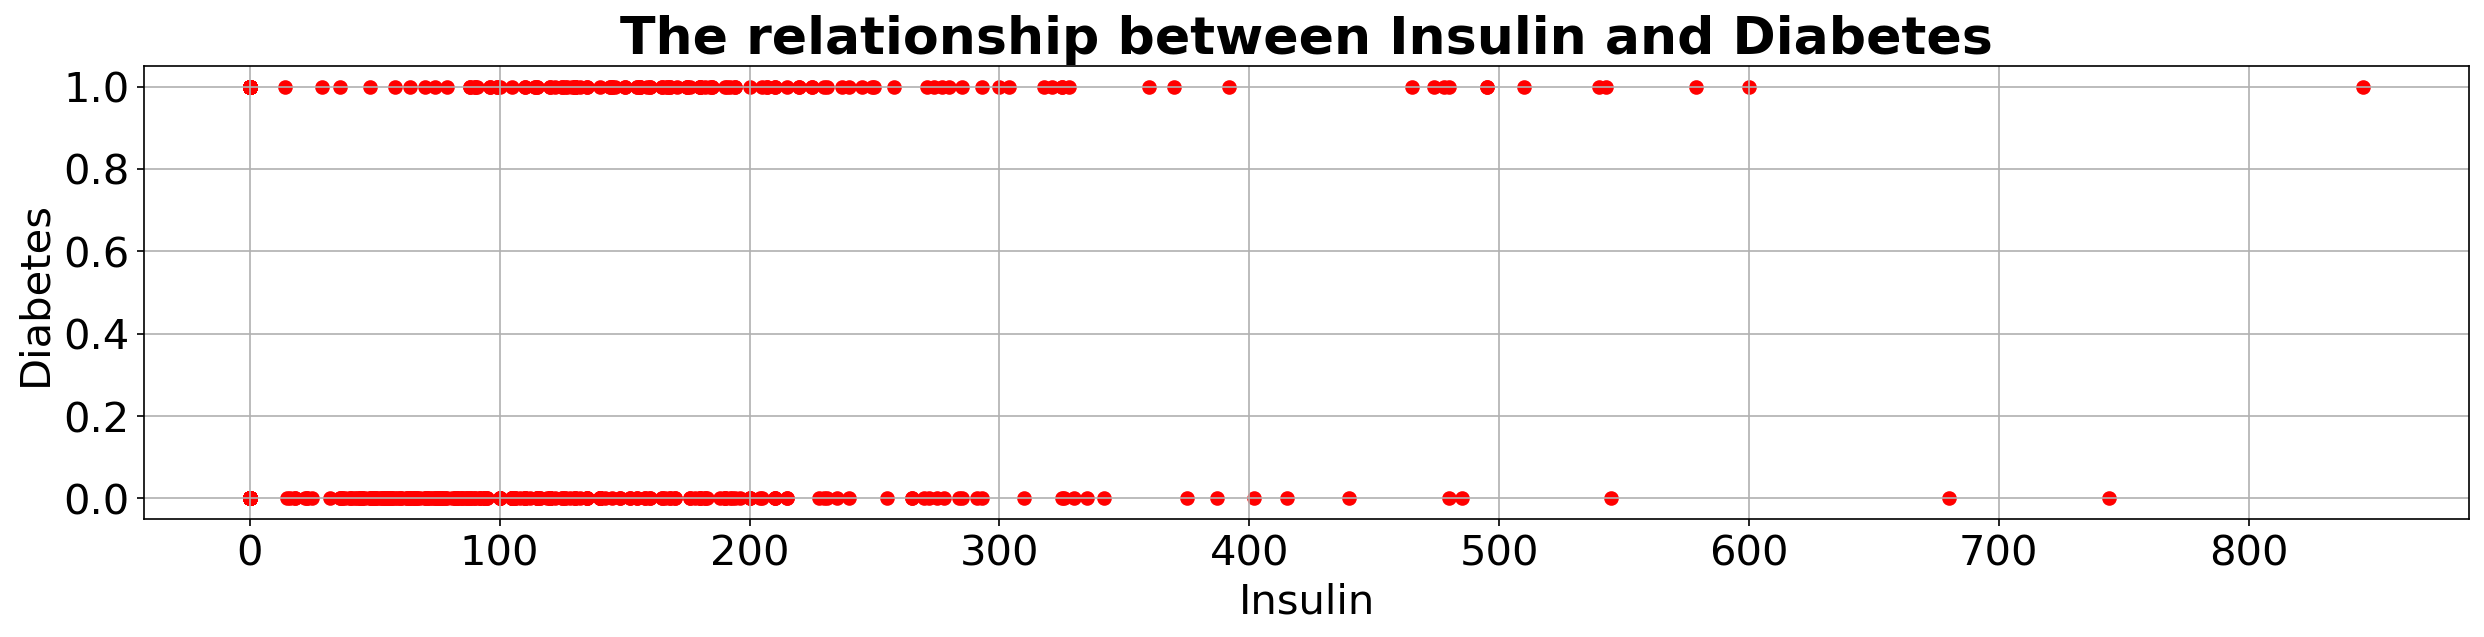

In [35]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (data["Insulin"] , data["Outcome"] , color = "red")
plt.title ("The relationship between Insulin and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 900 , 100) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Insulin', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

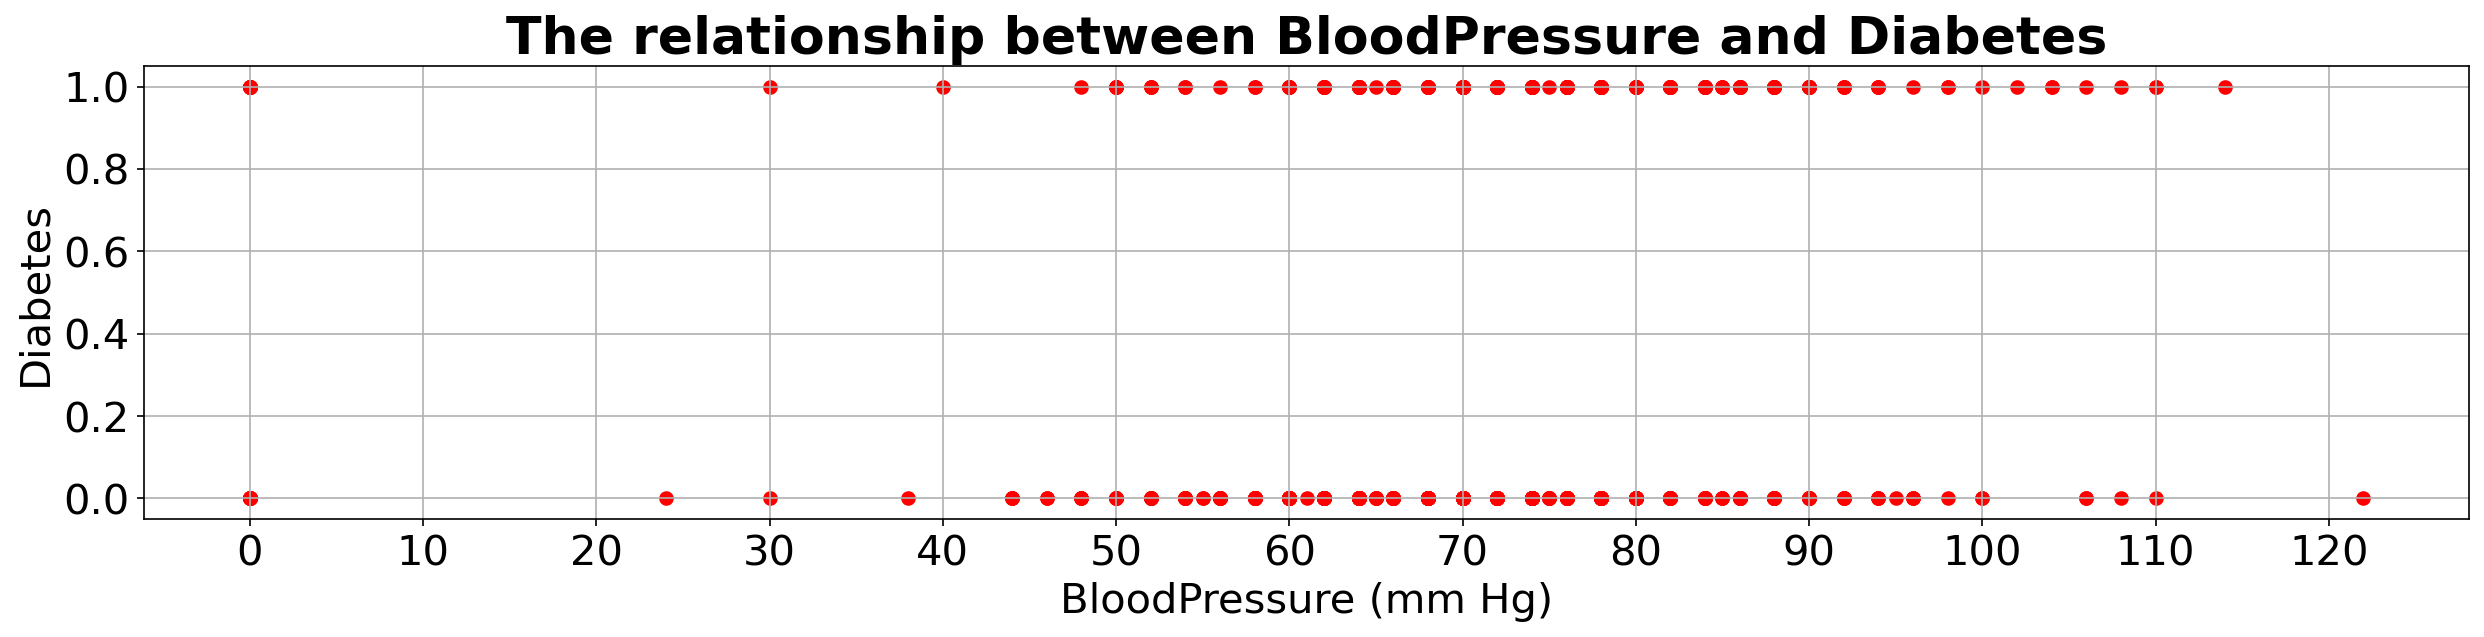

In [36]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (data["BloodPressure"] , data["Outcome"] , color = "red")
plt.title ("The relationship between BloodPressure and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 125 , 10) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('BloodPressure (mm Hg)', fontsize = 20)
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

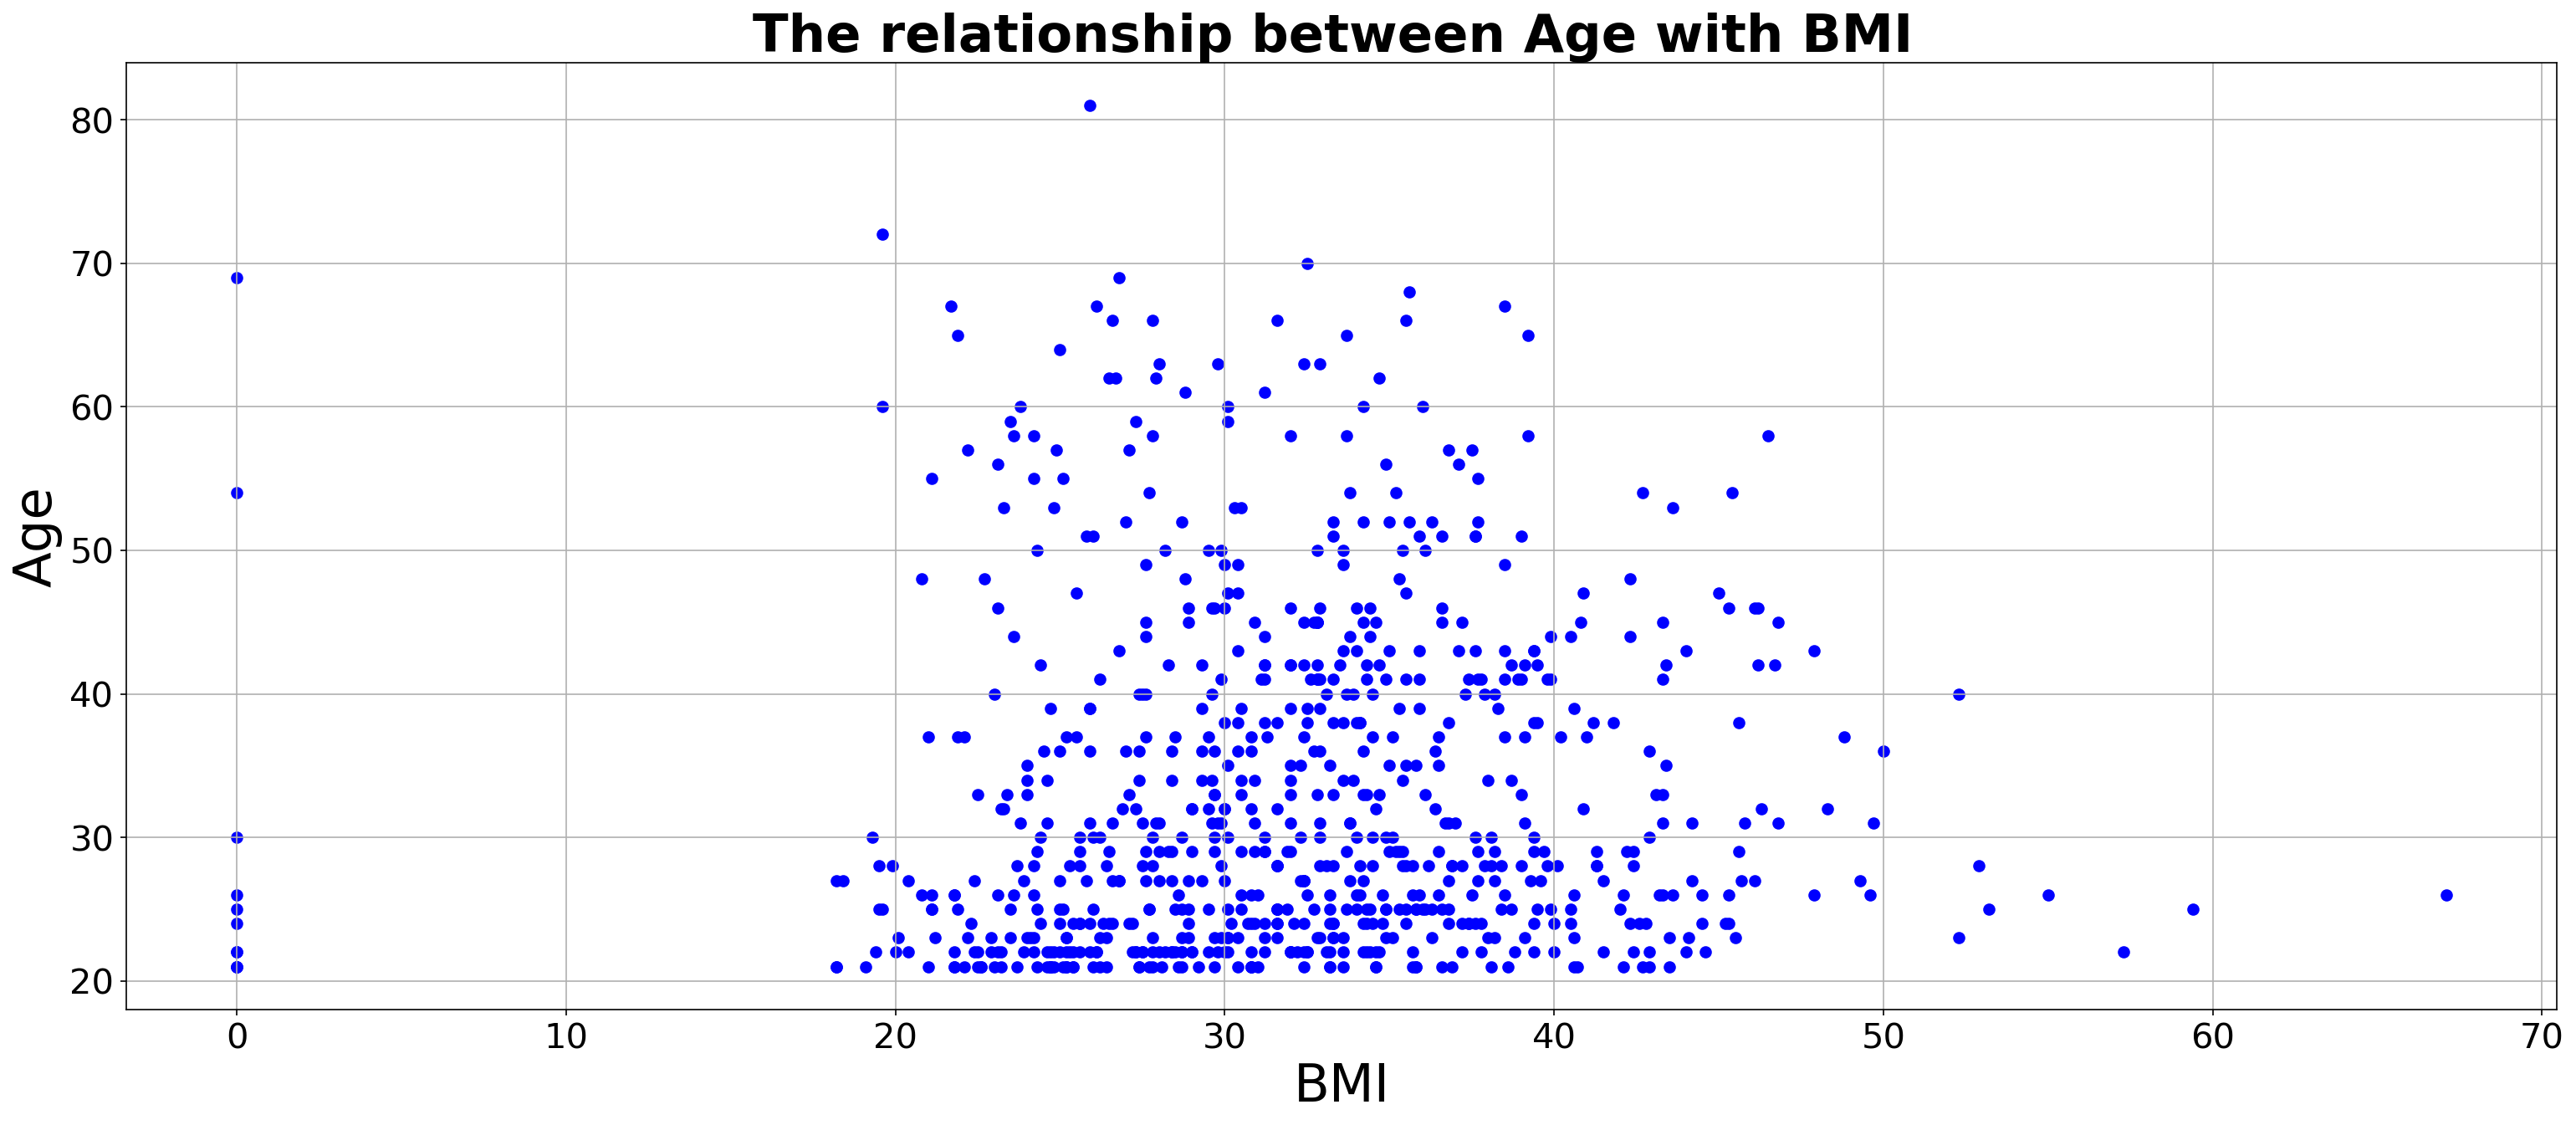

In [37]:
plt.figure(figsize = [25, 10] , dpi = 150) 
plt.scatter (data["BMI"] , data["Age"] , color = "blue")
plt.title ("The relationship between Age with BMI " , weight = 'bold', fontsize = 30)
plt.xticks (range (0 , 80 , 10) , fontsize = 20)
plt.yticks (range (20 , 90 , 10) , fontsize = 20)
plt.xlabel ('BMI', fontsize = 30 )
plt.ylabel ('Age' , fontsize = 30)
plt.grid ()
plt.show ()

In [38]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
x = pd.DataFrame (data , columns = ["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI"
                                   , "DiabetesPedigreeFunction" , "Age"])

In [42]:
y=data.Outcome

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

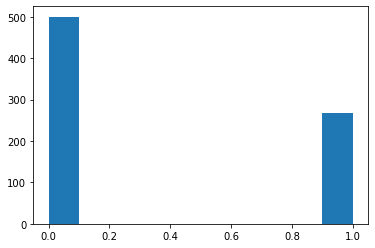

In [44]:
plt.hist(y)

In [46]:
(y==0).sum()/len(y)*100

65.10416666666666

In [47]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=0)

In [48]:
lr=LogisticRegression()

In [49]:
lr

LogisticRegression()

In [50]:
lr.fit(x_train,y_train)

C:\Users\niraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred=lr.predict(x_test)

In [53]:
y_pred_proba=lr.predict_proba(x_test)

In [54]:
metrics.accuracy_score(y_test, y_pred)

0.7916666666666666

In [61]:
lr.coef_

array([[ 0.10312298,  0.03481533, -0.0115804 ,  0.00956068, -0.00132924,
         0.07764579,  1.27035931,  0.02157202]])

In [62]:
lr.intercept_

array([-8.50335972])

In [63]:
lr.predict(x)

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [64]:
lr.score(x,y)

0.7760416666666666

In [66]:
confusion_matrix(y,lr.predict(x))

array([[439,  61],
       [111, 157]], dtype=int64)

In [68]:
print (classification_report (y , lr.predict (x)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       500
           1       0.72      0.59      0.65       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768

